In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

%matplotlib inline

## Более мелкий шаг по пространству

Снова проведем первый опыт с данными из файла, уменьшив шаг $h$ по пространству в 2 раза.

In [3]:
model_three_finer_h = model_from_file('data/model_three_finer_h.csv')

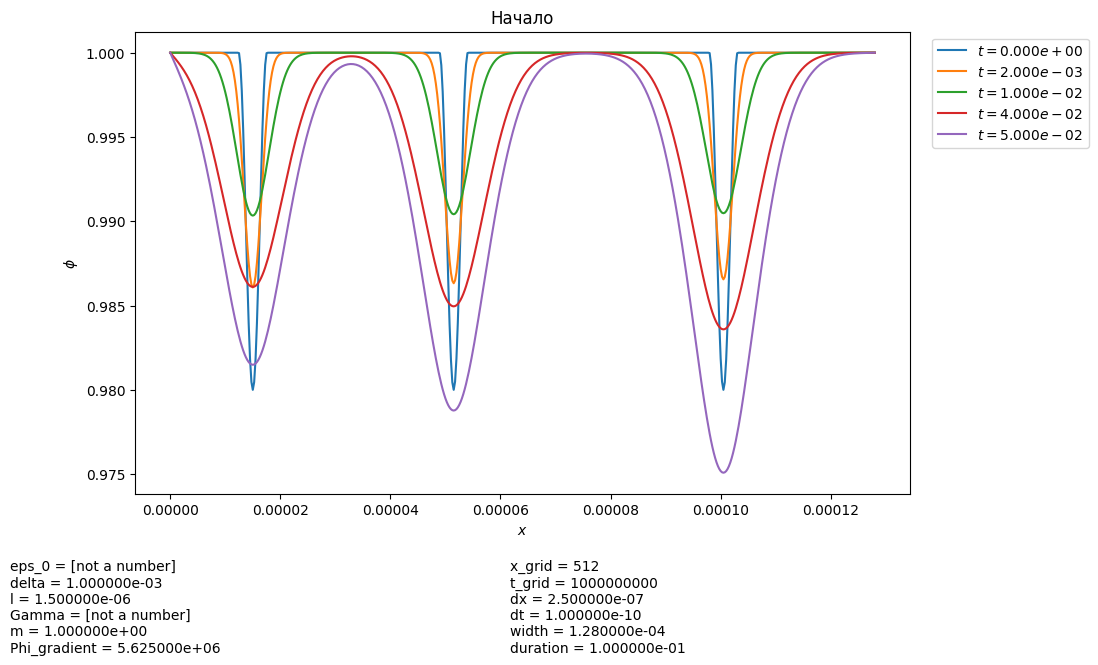

In [4]:
model_plot(model_three_finer_h, [0, 2e-3, 1e-2, 4e-2, 5e-2], figsize=(10, 6),
           title='Начало')

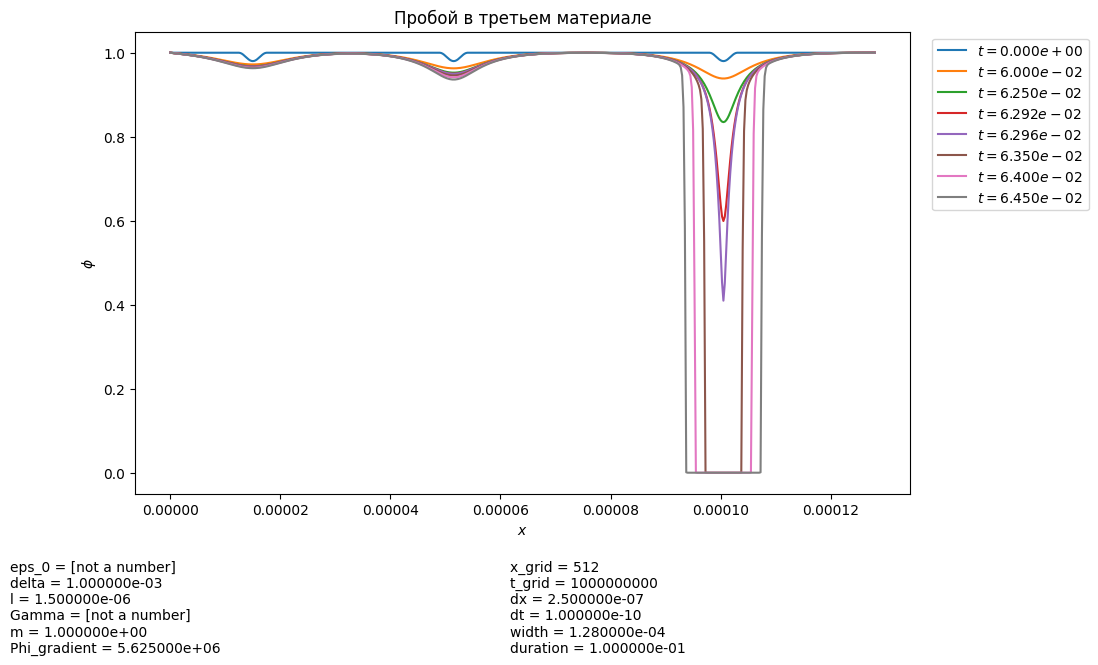

In [5]:
model_plot(model_three_finer_h, [0, 6e-2, 6.25e-2, 6.292e-2, 6.296e-2, 6.35e-2, 6.4e-2, 6.45e-2], figsize=(10, 6),
           title='Пробой в третьем материале')

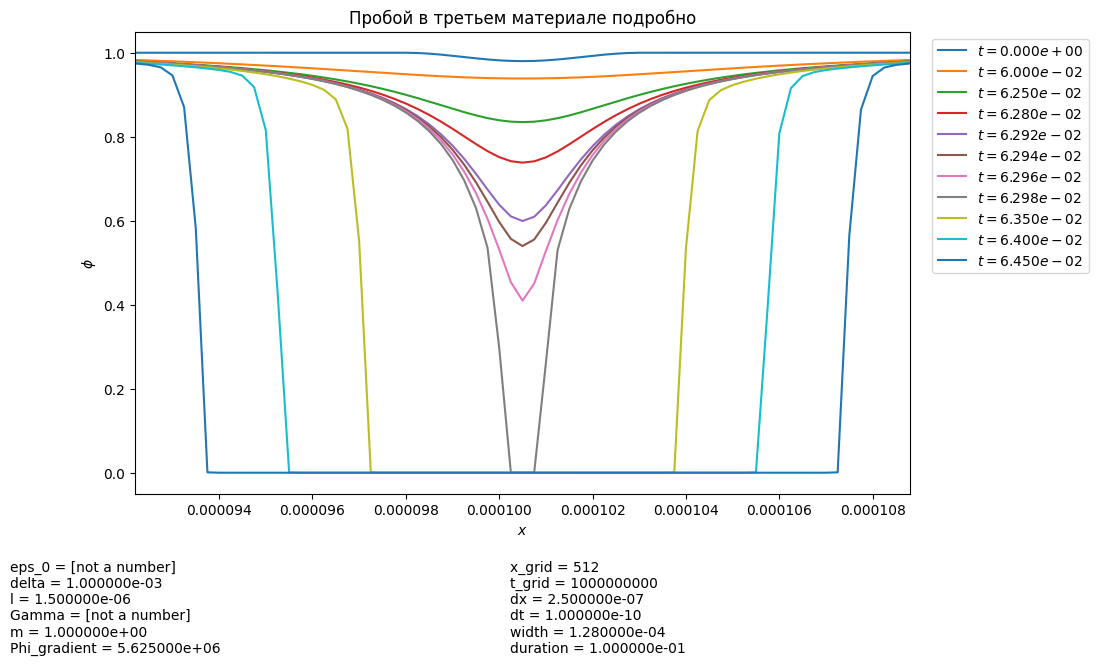

In [6]:
model_plot(model_three_finer_h, [
    0, 6e-2, 6.25e-2, 6.28e-2, 6.292e-2, 6.294e-2, 6.296e-2, 6.298e-2, 6.35e-2, 6.4e-2, 6.45e-2
], figsize=(10, 6), title='Пробой в третьем материале подробно', xlim=[1.28e-4 * 0.7203, 1.28e-4 * 0.85])

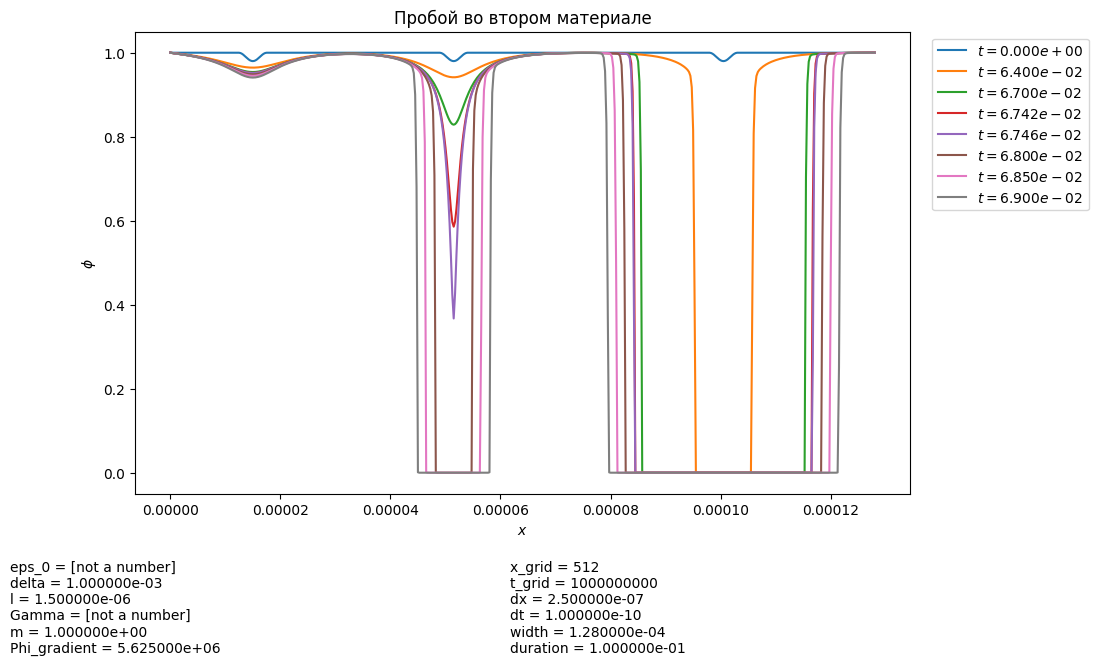

In [7]:
model_plot(model_three_finer_h, [0, 6.4e-2, 6.7e-2, 6.742e-2, 6.746e-2, 6.8e-2, 6.85e-2, 6.9e-2], figsize=(10, 6),
           title='Пробой во втором материале')

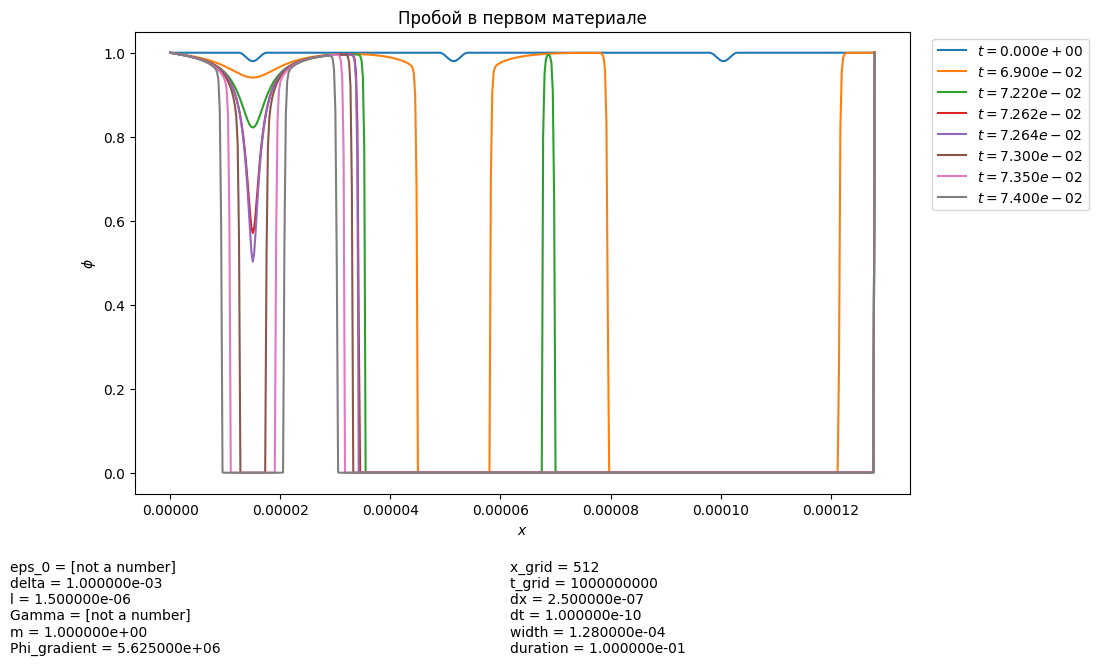

In [8]:
model_plot(model_three_finer_h, [0, 6.9e-2, 7.22e-2, 7.262e-2, 7.264e-2, 7.3e-2, 7.35e-2, 7.4e-2], figsize=(10, 6),
           title='Пробой в первом материале')

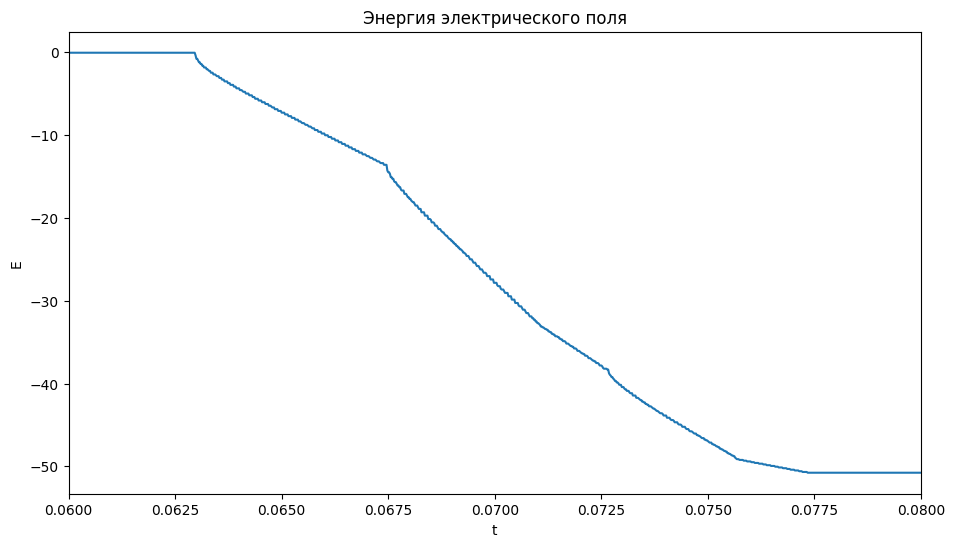

In [9]:
plt.figure(figsize=(11, 6))
plt.title('Энергия электрического поля')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim([0.06, 0.08])
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_electrical)
plt.show()

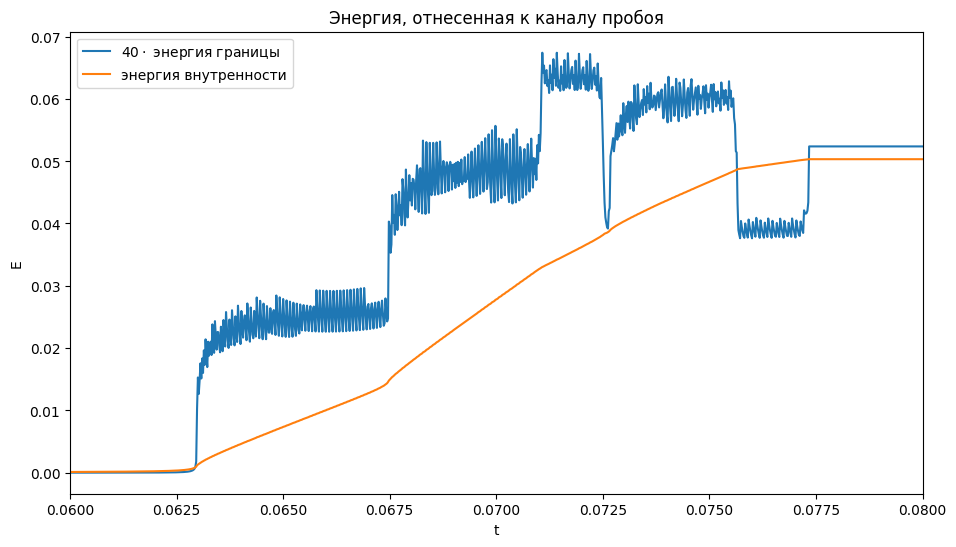

In [10]:
plt.figure(figsize=(11, 6))
plt.title('Энергия, отнесенная к каналу пробоя')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim([0.06, 0.08])
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_border * 40)
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_inner)
plt.legend([
    r'$40 \cdot$ энергия границы',
    'энергия внутренности'
])
plt.show()

In [11]:
model_three_finer_h_energy = \
    model_three_finer_h.energy_electrical + model_three_finer_h.energy_border + model_three_finer_h.energy_inner
model_three_finer_h_Delta_energy = model_three_finer_h_energy[1:] - model_three_finer_h_energy[:-1]
print('Полная энергия падала, раз:\t', (model_three_finer_h_Delta_energy < 0).sum())
print('Полная энергия возрастала, раз:\t', (model_three_finer_h_Delta_energy > 0).sum())

Полная энергия падала, раз:	 3642
Полная энергия возрастала, раз:	 228


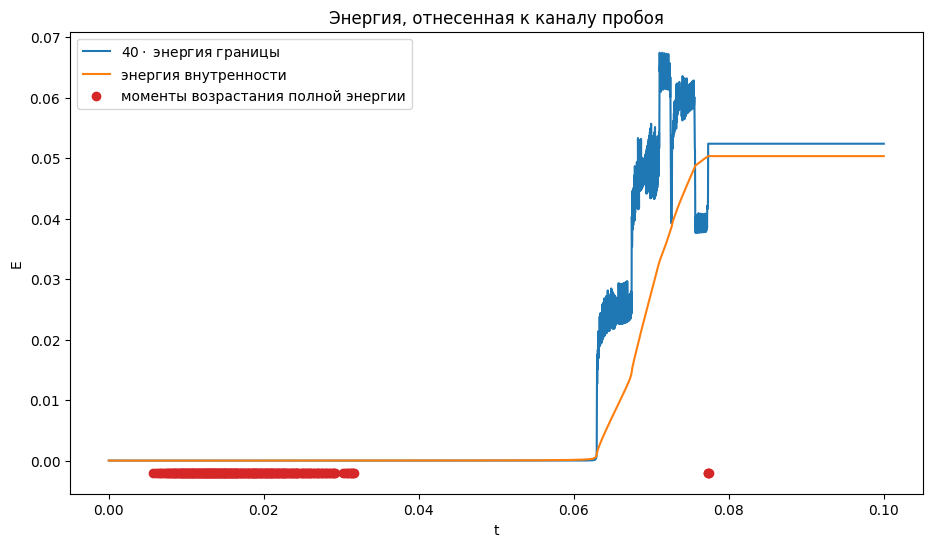

In [12]:
plt.figure(figsize=(11, 6))
plt.title('Энергия, отнесенная к каналу пробоя')
plt.xlabel('t')
plt.ylabel('E')
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_border * 40)
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_inner)
ts_of_energy_increase = model_three_finer_h.ts[:-1][model_three_finer_h_Delta_energy > 0]
plt.scatter(ts_of_energy_increase, np.zeros_like(ts_of_energy_increase) - 0.002, color='C3')
plt.legend([
    r'$40 \cdot$ энергия границы',
    'энергия внутренности',
    'моменты возрастания полной энергии'
])
plt.show()

## Сравнение графиков энергии

In [13]:
model_three = model_from_file('data/model_three.csv')

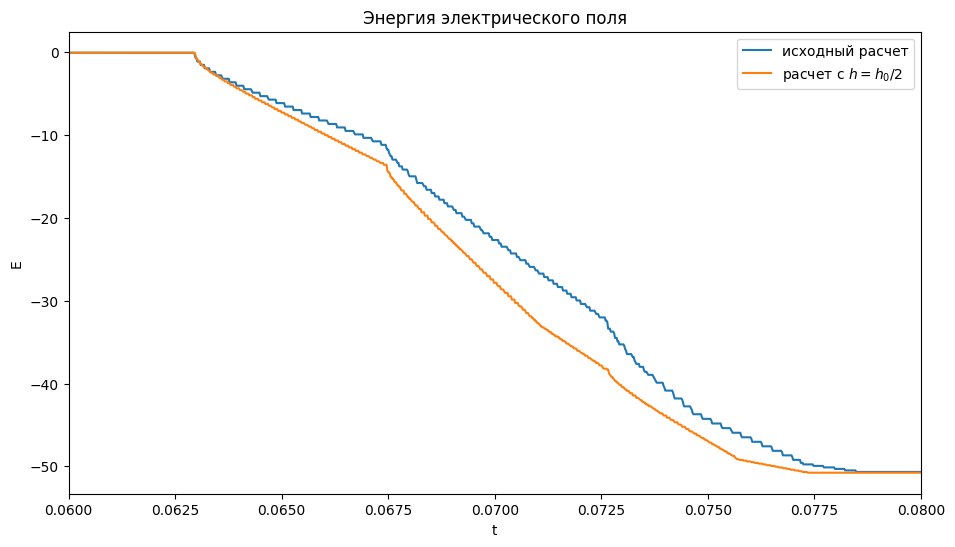

In [14]:
plt.figure(figsize=(11, 6))
plt.title('Энергия электрического поля')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim([0.06, 0.08])
plt.plot(model_three.ts, model_three.energy_electrical)
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_electrical)
plt.legend(['исходный расчет', 'расчет с $h = h_0 / 2$'])
plt.show()

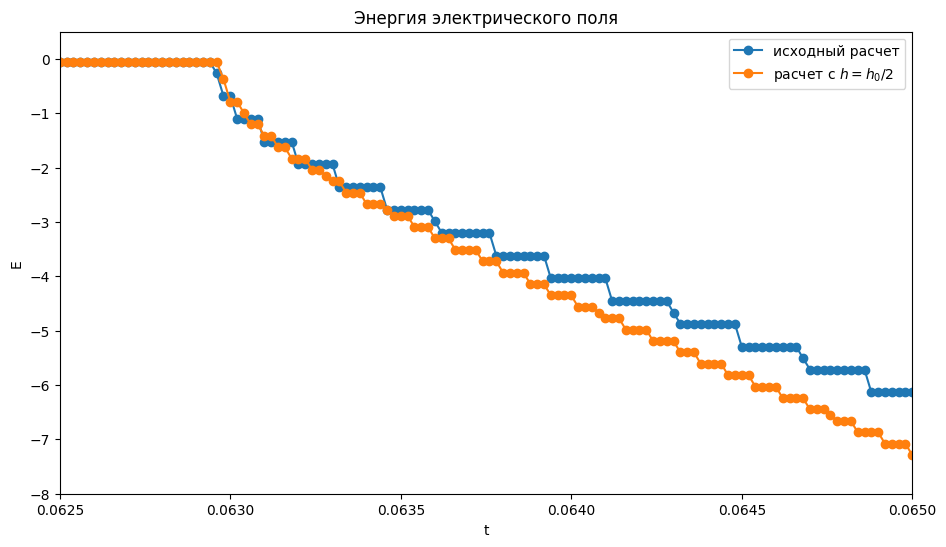

In [15]:
plt.figure(figsize=(11, 6))
plt.title('Энергия электрического поля')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim([0.0625, 0.065])
plt.ylim([-8, 0.5])
plt.plot(model_three.ts, model_three.energy_electrical, '-o')
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_electrical, '-o')
plt.legend(['исходный расчет', 'расчет с $h = h_0 / 2$'])
plt.show()

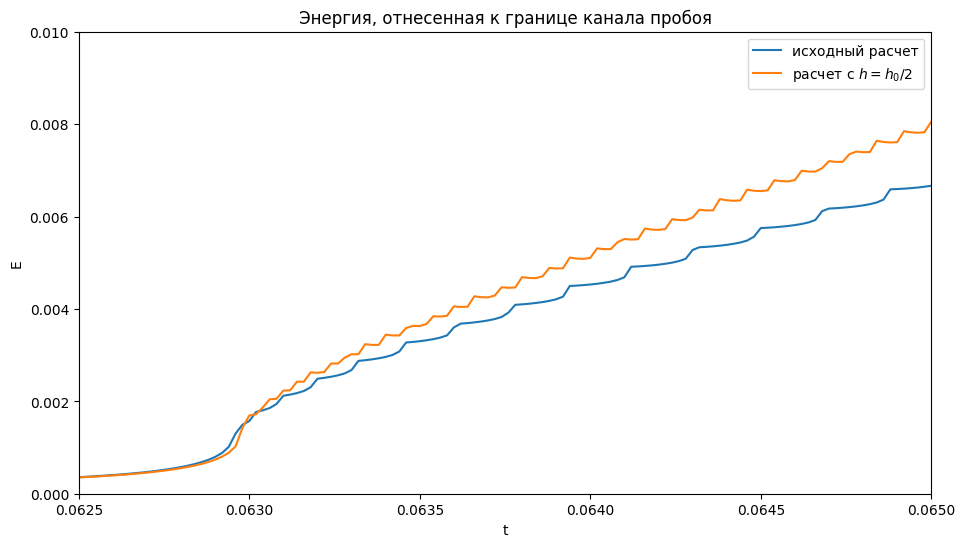

In [16]:
plt.figure(figsize=(11, 6))
plt.title('Энергия, отнесенная к границе канала пробоя')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim([0.0625, 0.065])
plt.ylim([0, 0.01])
plt.plot(model_three.ts, model_three.energy_border + model_three.energy_inner)
plt.plot(model_three_finer_h.ts, model_three_finer_h.energy_border + model_three_finer_h.energy_inner)
plt.legend(['исходный расчет', 'расчет с $h = h_0 / 2$'])
plt.show()